## Content

- **Explanation of UseCase:**
  - AT&T Churn Prediction introduction
  - Dataset downloand and read

- **Intro to LogisticRegression:**
  - Recap of Linear Regression

  - Definition

- **Thresholding and Step function:**
  - Definition

  - Problem with step function

- **Sigmoid function**
  - Plot and mathematical definition
  - Thresholding
  - Properties

- **Geometric Interpretation**


- **Implementation**


- **MLE(Maximum Log Likelihood)**

- **LogLoss and Optimization**

## Introduction to AT&T Churn UseCase

AT & T, one of the leading telecommunications companies of USA, faces the challenge of customer churn, where customers switch to competitors due to issues such as bad network, poor customer service, and so on.

As a Data Scientist, you are tasked to develop a machine learning model to predict whether a customer will be churned or not, based on various parameters, such as state, number of evening calls, number of day calls, etc.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/841/original/z.png?1705230591' width=700>

Let's look at the data

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 110MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


**Data Description**
<center>

| Records | Features |
| :-- | :-- |
| 5700 | 21 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **state** | 2-letter code of the US state of customer residence|
|02| **account_length** | Number of months the customer has been with the current telco provider |
|03|**area_code**|string="area_code_AAA" where AAA = 3 digit area code|
|04|**intl_plan**|The customer has international plan|
|05|**vmail_plan**| The customer has voice mail plan|
|06|**vmail_messages**|Number of voice-mail messages|
|07|**day_mins**|Total minutes of day calls|
|08|**day_calls**|Total no of day calls|
|09|**day_charge**|Total charge of day calls|
|10|**eve_mins**|Total minutes of evening calls|
|11|**eve_calls**|Total no of evening calls|
|12|**eve_charge**|Total charge of evening calls|
|13|**night_mins**|Total minutes of night calls|
|14|**night_calls**|Total no of night calls|
|15|**night_charge**|Total charge of night calls|
|16|**intl_mins**|Total minutes of international calls|
|17|**intl_calls**|Total no of international calls|
|18|**intl_charge**|Total charge of international calls|
|19|**customer_service_calls**|Number of calls to customer service|
|20|**phone**|10 digit number|
|21|**churn**|Customer churn - target variable|

In [ ]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

Observe:
- The number of values are same for both "0" and "1"

## Intro to Logistic Regression

Before we dive into logistic regression, let's look at few notations we will be following.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/842/original/z.png?1705230629' width=700>

#### Recap

To solve this task, let's first recap what we have learnt in linear regression

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/843/original/z.png?1705230660' width=700>

#### What kind of algorithm is logistic regression?

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/844/original/z.png?1705230758' width=700>

- It is a supervised algorithm
- Mainly used for classification tasks
- Can only solve binary classification problems

**Do you guys remember the fish sorting problem from "Maths for ML" module?**

It can be stated as,
$D = \{(x^{(i)}, y^{(i)})^m_{i=1}; x^{(i)} \in R^d; y^{(i)} \in \{0,1\}, y^{(i)} ∉ R\}$

For any given value of x, y belongs only to either 0 or 1, and it can't be a real number other than 0  and 1

Our customer churn problem is very similar to this

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/846/original/z.png?1705230786' width=700>

The task in classification is to be able to separate the two classes

- The **main difference** is

  - In Lin. Reg., we were finding the line of best fit in d+1 dimensional space,i.e., d feature and y (target variable)
  - But in Logistic Regression, we are looking for a hyperplane in d-dimensional space.


We know a linaer regression model gives output as a continous value from $-∞$ to $∞$.

#### What should we modify in a linear model to be able to give values as either 0 or 1?

We will use something called as thresholding

## Thresholding and Step Function

#### What function can we use to threshold the values?

We can select our own threshold value, and set the condition based on that.

The function would look like a step.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/847/original/z.png?1705230823' width=700>

#### Do you notice a problem with this step function?

It is non-differentiable, and hence, we cannot perform derivative operation.

#### What better function can we use other than step function to threshold our values?

## Sigmoid/Logistic Function

The term "logistic regression" comes from this function
- At the base, it's doing regression only
- On top of Regression, we are applying logistic function, hence logistic regression

#### What is the sigmoid function?

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/848/original/z.png?1705230852' width=700>

## Implementation

#### Defining sigmoid function

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)

In [ ]:
sigmoid(1.99)

0.8797431375322491

In [ ]:
sigmoid(0)

0.5

In [ ]:
sigmoid(-0.9)

0.28905049737499605

#### Visualizing sigmoid

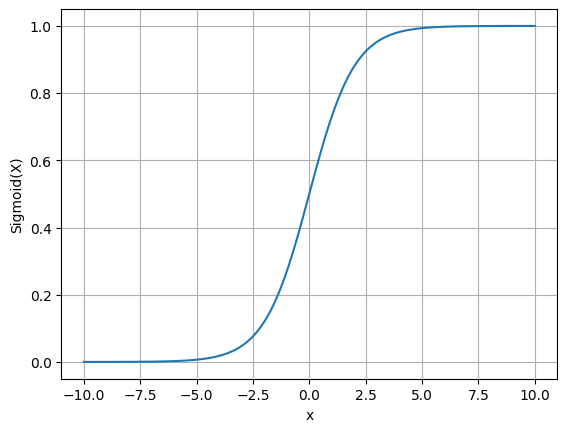

In [ ]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

Observe,

- The curve of sigmoid looks exactly like an S shape curve with cutting the y axis for x=0, at y=0.5

Now that we have the sigmoid function, what loss function should we use?

The output of sigmoid function can be thought of as a probability of a point belonging to class 1

$\hat{y}^{(i)}=P(y^i=1|x^i)$

E.g.
=> If we get sigmoid value as 0.18, it means there's a 18% chance the point belongs to class 1

There is one issue though with sigmoid function.

#### What is a problem with sigmoid function being used for classification?

We are getting continuous values in the range of {0,1}

Can you suggest a way to convert this to categorical values?

#### **Thresholding**

We can take a threshold of 0.5

So values >= 0.5 will be 1, else 0

## Geometric Interpretation of Sigmoid

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/849/original/z.png?1705230896' width=700>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/850/original/z.png?1705230936' width=700>

**Conclusion:**

- Closer the point is to hyperplane,
    - more unsure we are with its probability of it belonging to a specific class

- Farther it is from hyperplane,
    - more confident we are of it belonging to specific class.

# **Maximum Log-likelihood**

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/851/original/z.png?1705231004' width=800>

#### <font color='green' >(Optional)</font> Difference between likelihood and probability ?

Let's try to understand the difference between likelihood and probability

Say, we plot the distribution of data of **students scores in module test**

- x axis is the marks and y axis the frequency (or density as in a kde plot)

Our task is to find the **probability** of a student's score lying in the range of 60 to 70


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/852/original/z.png?1705231047' width=700>

The probability can be said as
- the area under the distribution curve for the range of 60 and 70
- in this case it would be 0.29, or 29%

The notation would be
- $pr(data|distribution)$

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/853/original/z.png?1705231075' width=700>

#### What about likelihood?

Say we want to find the likelihood of a student getting 63 marks?

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/854/original/z.png?1705231144" width
=700>

That would simply be the value on the y-axis for the distribution, in this cae, 0.12

The notation would be
- $L(dist.|data)$

So what's the major difference?

- In likelihood the data is fixed, we move the distribution to fit the data.
- In probability, we change the data as per our requirement.

On a simpler terms,
- Probability refers to the possibility of something happening
- While likelihood refers to determining the data distribution for a given data point


#### So how is this conneted to MLE in logistic regression?

- Likelihood function determines the distribution given some observed data
- In logistic regression, we are given the observed data for which we are trying to find the parameters to
- MLE maximizes the likelihood of the likelihood function to be able to estimate the parameters of the observed data

<!-- **Assume** we toss a fair coin.

**What'll be the probability of getting a heads?**
=> 1/2 or 0.5

**What'll be the probability of getting a tails?**
- Same. 0.5

Notice that
- when calculating probability or how likely a specific outcome will occur
- we started off with an assumed condition

The condition in this case was **fair coin** -->


<!--
Now take **another example**:

Say, we tossed a coin 10 times.
- Out of 10 we got 8 heads and 2 tails.

based on this, we want to know whether it is a fair coin or biased coin.

Notice that
- this time there is **no assumption** whether we have fair coin or baised coin
- and we are provided with observed data (coin tossed 10 times.)

Based on this, we get the **likelihood**
- i.e. get the plausibility of hypothesis based on observed data.

It is basically reverse engineering.
- Instead of giving us a assumption,
    - we are given a data and have been asked to whether the assumption will hold for this data.
    - This is where we calculate the likelihood of it.


 -->


<!--
**So, why likelihood when performing MLE?**

In logistic regression, We are trying to **find the parameters** of a model based on **observed data**


- and likelihood tells us plausibility of how well the chosen parameters explain the observed data. -->

### Maximizing Likelihood Estimation

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/855/original/z.png?1705231204' width=700>

We can write the above as:


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/390/original/image_2023-06-08_151021163.png?1686217222)

We plot the error vs prediction plot for $y^{(i)}=0$ and $y^{(i)}=1$

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/857/original/z.png?1705231276' width=800>

Notice, this is the same as our negative log likelihood we dervied earlier


### Why can't we use MSE as loss for classification?

Before we dive into this, let's look at convex and non convex fuction

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/858/original/z.png?1705231302' width=700>

#### What function would you prefer when solving for optimization problem of logisitic regression ?

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/859/original/z.png?1705231329' width=700>

**But, if we choose MSE with sigmoid, it'll be a non convex function.**
- and we may not reach optimal solution.



#### But, we use MSE for linear regression. It was giving optimal solution. Why didn't we face this issue over there?

Yes. Pay attention

- **MSE when used with sigmoid as predictor** turns out to be non convex.

We didn't use sigmoid as predictor in linear regression. Hence, it was convex over there

#### Why MSE used with sigmoid is non convex?

There's a mathematical proof behind it. If you are interested, you can read more here: https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c

Hence, **we choose logloss with sigmoid**
- which is a convex function

and gurantees that we reach optimal solution.

### Let's implement log-loss now


In [ ]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

**Quiz 12 :** (What do you think?)
```
What do you think would be the change to the code to implement it for m-points?
A. -np.mean(loss)
B. -loss/m, m being number of points
C. -np.sum(loss)

Ans: -np.mean(loss)
```

In [ ]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

0.01005033585350145

Observe, how small log loss is

In [ ]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

0.6931471805599453

In [ ]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

2.3025850929940455

Observe, how high the log loss is

## Optimization

#### Do we need regularization?

Yes, we can add regularization to prevent overfitting of the model

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/860/original/z.png?1705231378' width=700>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/861/original/z.png?1705231423' width=700>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/862/original/z.png?1705231455' width=700>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/863/original/z.png?1705231480' width=700>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/864/original/z.png?1705231506' width=700>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/865/original/z.png?1705231533' width=700>

#### Extra Read: Scratch impl of Log. Reg


- https://colab.research.google.com/drive/16OjEQ0RExT7AlgyasMlvyvdCt0TNB18m?usp=share_link